In [219]:
import numpy as np
from pulp import *
import matplotlib.pyplot as plt

In [220]:
def DailyNeeds(gender,age,weight,height,activity,goal):
    #Activity: sedentary, lightly active, moderately active, very active, extra active
    #Goals:LoseFat,GainMuscle,Preserve
    if activity=='sedentary':
        activity_factor=1.2
    elif activity=='lightly active':
        activity_factor=1.375
    elif activity=='moderately active':
        activity_factor=1.55
    elif activity=='very active':
        activity_factor=1.725
    elif activity=='extra active':
        activity_factor=1.9
        
    if gender=='m' or gender == 'male' or gender == 'man':
        calories= (10 * weight + 6.25 * height  - 5 * age  + 5)*activity_factor
    elif gender=='f' or gender=='female' or gender =='woman' or gender =='w':
        calories= (10 * weight + 6.25 * height  - 5 * age  - 161)*activity_factor 
    
    if goal=='LoseFat':
        new_calories=calories*0.85
        carbs_c,fat_c,protein_c=0.30*new_calories,0.30*new_calories,0.40*new_calories
    elif goal=='GainMuscle':
        new_calories=calories*1.15
        carbs_c,fat_c,protein_c=0.40*new_calories,0.30*new_calories,0.30*new_calories
    elif goal=='Preserve':
        new_calories=calories
        carbs_c,fat_c,protein_c=0.5*calories,0.25*calories,0.25*calories
    return new_calories,carbs_c/4,fat_c/9,protein_c/4  

In [221]:
VarToFood={'x_0':'Eggs','x_1':'Milk1.7%','x_2':'Yoghurt5%','x_3':'Cereal','x_4':'Brocoli',
           'x_5':'OrangeJuice','x_6':'Apple','x_7':'Orange','x_8':'Chicken','x_9':'Beef',
           'x_10':'Pork','x_11':'Fish','x_12':'Beer','x_13':'Spaghetti','x_14':'Rice'
           ,'x_15':'Bread','x_16':'Lentils','x_17':'Beans','x_18':'Potatoes','x_19':'OliveOil'}

In [222]:
#CleanDiet
Foods={
    'Eggs':{'Cals':77,'Carbs':0.55,'Fat':5.5,'Protein':6.5,'VitaminB12':1.1,'Iron':0.6,'Calcium':25,'Potassium':63,'Na':62,'Time':6,'Cost':0.3,},
    'Milk1.7%':{'Cals':121,'Carbs':12,'Fat':4.3,'Protein':8.8,'VitaminB12':1,'Iron':0,'Calcium':300,'Potassium':300,'Na':88,'Time':2,'Cost':0.3575},
    'Yoghurt5%':{'Cals':196,'Carbs':7.4,'Fat':10,'Protein':18,'VitaminB12':1.6,'Iron':0.2,'Calcium':242,'Potassium':282,'Na':72,'Time':2,'Cost':0.6},
    'Cereal':{'Cals':234,'Carbs':32.8,'Fat':5.1,'Protein':11.3,'VitaminB12':1,'Iron':2,'Calcium':315.6,'Potassium':408,'Na':91,'Time':3,'Cost':0.6295},
    'Brocoli':{'Cals':55,'Carbs':8.1,'Fat':0.5,'Protein':4.7,'VitaminB12':0,'Iron':1,'Calcium':70,'Potassium':469,'Na':50,'Time':13,'Cost':0.5},
    'OrangeJuice':{'Cals':116,'Carbs':25,'Fat':0.3,'Protein':1.5,'VitaminB12':0,'Iron':0.45,'Calcium':27,'Potassium':500,'Na':2.5,'Time':2,'Cost':0.5825},
    'Apple':{'Cals':52,'Carbs':13.8,'Fat':0.2,'Protein':0.3,'VitaminB12':0,'Iron':0.1,'Calcium':6,'Potassium':107,'Na':1,'Time':1,'Cost':0.157},
    'Orange':{'Cals':60,'Carbs':15.4,'Fat':0.1,'Protein':1,'VitaminB12':1.1,'Iron':0.6,'Calcium':40,'Potassium':237,'Na':0,'Time':1,'Cost':0.17},
    'Chicken':{'Cals':164,'Carbs':0,'Fat':3.6,'Protein':31,'VitaminB12':0.2,'Iron':1,'Calcium':15,'Potassium':256,'Na':74,'Time':20,'Cost':0.8},
    'Beef':{'Cals':250,'Carbs':0,'Fat':15,'Protein':26,'VitaminB12':2.6,'Iron':2.6,'Calcium':18,'Potassium':318,'Na':72,'Time':17,'Cost':1.145},
    'Pork':{'Cals':242,'Carbs':0,'Fat':14,'Protein':27,'VitaminB12':0.7,'Iron':0.9,'Calcium':19,'Potassium':423,'Na':62,'Time':20,'Cost':0.57},
    'Fish':{'Cals':205,'Carbs':0,'Fat':12,'Protein':22,'VitaminB12':2.8,'Iron':0.3,'Calcium':15,'Potassium':384,'Na':61,'Time':17,'Cost':1},
    'Beer':{'Cals':132,'Carbs':1.32,'Fat':0,'Protein':1.32,'VitaminB12':0,'Iron':0,'Calcium':12,'Potassium':81,'Na':12,'Time':1,'Cost':0.74},
    'Spaghetti':{'Cals':359,'Carbs':71.7,'Fat':2,'Protein':12,'VitaminB12':0,'Iron':1.3,'Calcium':7,'Potassium':44,'Na':1,'Time':13,'Cost':0.21},
    'Rice':{'Cals':179,'Carbs':37.65,'Fat':1.1,'Protein':4.2,'VitaminB12':0,'Iron':0.1,'Calcium':5,'Potassium':17.5,'Na':0.5,'Time':13,'Cost':0.265},
    'Bread':{'Cals':88,'Carbs':16,'Fat':1,'Protein':3,'VitaminB12':0,'Iron':1.2,'Calcium':86.7,'Potassium':38.3,'Na':163.7,'Time':1,'Cost':0.1},
    'Lentils':{'Cals':424,'Carbs':39.9,'Fat':0.8,'Protein':17.9,'VitaminB12':0,'Iron':2.6,'Calcium':13.3,'Potassium':258,'Na':1.4,'Time':23,'Cost':0.26},
    'Beans':{'Cals':521,'Carbs':60,'Fat':21.2,'Protein':23,'VitaminB12':0,'Iron':5.1,'Calcium':113,'Potassium':456,'Na':12,'Time':23,'Cost':0.37},
    'Potatoes':{'Cals':152,'Carbs':34,'Fat':0.2,'Protein':4,'VitaminB12':0,'Iron':1.6,'Calcium':24,'Potassium':842,'Na':12,'Time':15,'Cost':0.11},
    'OliveOil':{'Cals':120,'Carbs':0,'Fat':14,'Protein':0,'VitaminB12':0,'Iron':0,'Calcium':0,'Potassium':0,'Na':0,'Time':0,'Cost':0.08}
           }

In [223]:
new_calories,carbs,fat,protein =DailyNeeds('m',22,78,180,'moderately active','GainMuscle')
print(new_calories,carbs,fat,protein)

3208.4999999999995 320.84999999999997 106.94999999999999 240.63749999999996


In [224]:
minB12,minI,maxI,minCa,maxCa,minK,maxK,minNa,maxNa,k=2.4,18,45,1200,2500,2000,4700,500,2300,40
c1,c2,Amin,Amax=[],[],[],[]
bmin=[new_calories,carbs,fat,protein,minB12,minI,minCa,minK,minNa]
bmax=[new_calories+k,maxI,maxCa,maxK,maxNa]

keysmin=['Cals','Carbs','Fat','Protein','VitaminB12','Iron','Calcium','Potassium','Na']
keysmax=['Cals','Iron','Calcium','Potassium','Na']
for key in Foods:
    c1.append(Foods[key]['Cost'])
    c2.append(Foods[key]['Time'])
for i in keysmin:
    row=[]
    for key in Foods:
        row.append(Foods[key][i])
    Amin.append(row)
for i in keysmax:
    row=[]
    for key in Foods:
        row.append(Foods[key][i])
    Amax.append(row)

# Initial Solution

In [225]:
prob = LpProblem("DietPlan1", LpMinimize)
COLS = range(len(Amin[0]))

# decision variables are created
x = LpVariable.dicts('x', COLS, lowBound=0, cat='Continuous')

# objective function
prob += lpSum(c1[j] * x[j] for j in COLS), "obj"

# Constraints
for i in range(len(Amin)):
    prob += lpSum(Amin[i][j] * x[j] for j in COLS) >= bmin[i], keysmin[i]+'min'
    
for i in range(len(Amax)):
    prob += lpSum(Amax[i][j] * x[j] for j in COLS) <= bmax[i],  keysmax[i]+'max'

x[0].cat = 'Integer'
x[6].cat = 'Integer'
x[7].cat = 'Integer'
x[15].cat = 'Integer'
x[16].cat = 'Integer'
x[17].cat = 'Integer'
x[19].cat = 'Integer'

    
#print(prob)
prob.solve()
print("Status:", LpStatus[prob.status])
print(f'objective :{value(prob.objective):5.2f}')
#Optimal variables values
for v in prob.variables():
    if v.varValue>0:
        print(f'{VarToFood[v.name]} = {v.varValue:5.2f} portions')    
# Constraint values
for n,c in prob.constraints.items():
    print(f'contstraint:{n}, Value:{c.value():5.2f}')

Status: Optimal
objective : 5.56
Milk1.7% =  2.60 portions
Pork =  1.33 portions
Spaghetti =  1.53 portions
Beans =  3.00 portions
Chicken =  3.05 portions
contstraint:Calsmin, Value:40.00
contstraint:Carbsmin, Value: 0.00
contstraint:Fatmin, Value: 0.49
contstraint:Proteinmin, Value:-0.00
contstraint:VitaminB12min, Value: 1.74
contstraint:Ironmin, Value: 3.53
contstraint:Calciummin, Value: 0.00
contstraint:Potassiummin, Value:1558.01
contstraint:Namin, Value:74.18
contstraint:Calsmax, Value: 0.00
contstraint:Ironmax, Value:-23.47
contstraint:Calciummax, Value:-1300.00
contstraint:Potassiummax, Value:-1141.99
contstraint:Namax, Value:-1725.82


# Solution dedicated to the user

In [226]:
prob = LpProblem("DietPlan1", LpMinimize)
COLS = range(len(Amin[0]))

# decision variables are created
x = LpVariable.dicts('x', COLS, lowBound=0, cat='Continuous')
x_chosen = LpVariable.dicts("Chosen",COLS,0,1,cat='Integer')
# objective function
prob += lpSum(c1[j] * x[j] for j in COLS), "obj"

# Constraints
for i in range(len(Amin)):
    prob += lpSum(Amin[i][j] * x[j] for j in COLS) >= bmin[i] , keysmin[i]+'min'
    
for i in range(len(Amax)):
    prob += lpSum(Amax[i][j] * x[j] for j in COLS) <= bmax[i] ,keysmax[i]+'max'

x[0].cat,x[6].cat,x[7].cat = 'Integer','Integer','Integer'
x[15].cat,x[16].cat,x[17].cat,x[19].cat = 'Integer','Integer','Integer','Integer'

x[4].lowBound = 1
x[6].lowBound = 1
x[7].lowBound = 1
x[8].upBound = 2
x[9].lowBound = 1
x[15].upBound = 2
x[16].upBound = 1
x[17].upBound = 1

    
#print(prob)
prob.solve()
print("Status:", LpStatus[prob.status])
print(f'objective :{value(prob.objective):5.2f}')
#Optimal variables values
for v in prob.variables():
    if v.name[0]!='C':
        if v.varValue>0:
            print(f'{VarToFood[v.name]} = {v.varValue:5.2f} portions')
# Constraint values
for n,c in prob.constraints.items():
    print(f'contstraint:{n}, Value:{c.value():5.2f}')

Status: Optimal
objective : 6.99
Milk1.7% =  2.64 portions
Pork =  3.48 portions
Spaghetti =  2.14 portions
Bread =  1.00 portions
Beans =  1.00 portions
Potatoes =  0.20 portions
Brocoli =  1.00 portions
Apple =  1.00 portions
Orange =  2.00 portions
Chicken =  1.22 portions
Beef =  1.00 portions
contstraint:Calsmin, Value:40.00
contstraint:Carbsmin, Value: 0.00
contstraint:Fatmin, Value: 0.00
contstraint:Proteinmin, Value: 0.00
contstraint:VitaminB12min, Value: 7.73
contstraint:Ironmin, Value: 0.66
contstraint:Calciummin, Value:71.02
contstraint:Potassiummin, Value:2700.00
contstraint:Namin, Value:342.05
contstraint:Calsmax, Value: 0.00
contstraint:Ironmax, Value:-26.34
contstraint:Calciummax, Value:-1228.98
contstraint:Potassiummax, Value: 0.00
contstraint:Namax, Value:-1457.95


# Solution without frequencies 

In [227]:
prob = LpProblem("DietPlan1", LpMinimize)
COLS = range(len(Amin[0]))
# decision variables are created
x = LpVariable.dicts('x', COLS, lowBound=0, cat='Continuous')
x_chosen=LpVariable.dicts('chosen', COLS, lowBound=0,upBound=1, cat='Integer')
# objective function
prob += lpSum(c1[j] * x[j] for j in COLS), "obj"

# Constraints
for i in range(len(Amin)):
    prob += lpSum(Amin[i][j] * x[j] for j in COLS) >= bmin[i]
    
for i in range(len(Amax)):
    prob += lpSum(Amax[i][j] * x[j] for j in COLS) <= bmax[i]
#Variety Constraint     
prob += lpSum( x_chosen[j] for j in COLS) >= 6
# see the full definition of this model
#print(prob)

x[0].cat = 'Integer'
x[6].cat = 'Integer'
x[7].cat = 'Integer'
x[15].cat = 'Integer'
x[16].cat = 'Integer'
x[17].cat = 'Integer'
x[19].cat = 'Integer'

#x[17].upBound = 1 #'Lentils'

for f in COLS:
    prob += x[f]>= x_chosen[f]*0.5
    prob += x[f]<= x_chosen[f]*1e5

#print(prob)
prob.solve()
print("Status:", LpStatus[prob.status])
print(f'objective :{value(prob.objective):5.2f}')
#Optimal variables values
for v in prob.variables():
    if v.name[0]!='c':
        if v.varValue>0:
            print(f'{VarToFood[v.name]} = {v.varValue:5.2f} portions')    
# Constraint values
for n,c in prob.constraints.items():
    print(f'contstraint:{n}, Value:{c.value():5.2f}')

Status: Optimal
objective : 5.56
Milk1.7% =  2.31 portions
Pork =  1.34 portions
Spaghetti =  1.35 portions
Bread =  1.00 portions
Beans =  3.00 portions
Chicken =  3.09 portions
contstraint:_C1, Value:40.00
contstraint:_C2, Value:-0.00
contstraint:_C3, Value: 0.21
contstraint:_C4, Value:-0.00
contstraint:_C5, Value: 1.47
contstraint:_C6, Value: 4.56
contstraint:_C7, Value:-0.00
contstraint:_C8, Value:1517.79
contstraint:_C9, Value:216.26
contstraint:_C10, Value:-0.00
contstraint:_C11, Value:-22.44
contstraint:_C12, Value:-1300.00
contstraint:_C13, Value:-1182.21
contstraint:_C14, Value:-1583.74
contstraint:_C15, Value: 0.00
contstraint:_C16, Value: 0.00
contstraint:_C17, Value: 0.00
contstraint:_C18, Value: 1.81
contstraint:_C19, Value:-99997.69
contstraint:_C20, Value: 0.00
contstraint:_C21, Value: 0.00
contstraint:_C22, Value: 0.00
contstraint:_C23, Value: 0.00
contstraint:_C24, Value: 0.00
contstraint:_C25, Value: 0.00
contstraint:_C26, Value: 0.00
contstraint:_C27, Value: 0.00
con

Text(0, 0.5, 'Cost')

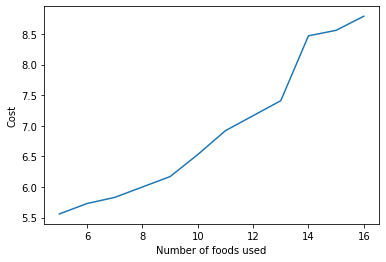

In [195]:
items=[5,6,7,9,10,11,13,14,15,16]
cost=[5.56,5.73,5.83,6.17,6.53,6.92,7.41,8.47,8.56,8.79]
plt.plot(items,cost)
plt.xlabel('Number of foods used')
plt.ylabel('Cost')

# Solution with minimum time in the kitchen

In [231]:
prob = LpProblem("DietPlanTime", LpMinimize)
COLS = range(len(Amin[0]))

# decision variables are created
x = LpVariable.dicts('x', COLS, lowBound=0, cat='Continuous')
x_chosen = LpVariable.dicts("Chosen",COLS,0,1,cat='Integer')
# objective function
prob += lpSum(c2[j] * x_chosen[j] for j in COLS), "obj"

# Constraints
for i in range(len(Amin)):
    prob += lpSum(Amin[i][j] * x[j] for j in COLS) >= bmin[i], keysmin[i]+'min'
    
for i in range(len(Amax)):
    prob += lpSum(Amax[i][j] * x[j] for j in COLS) <= bmax[i],  keysmax[i]+'max'

for i in COLS:
    prob += x[i]>= x_chosen[i]*0.5, 'chooseconstraintg'+str(i)
    prob += x[i]<= x_chosen[i]*1e5, 'chooseconstraintl'+str(i)
    
x[0].cat = 'Integer'
x[6].cat = 'Integer'
x[7].cat = 'Integer'
x[15].cat = 'Integer'
x[16].cat = 'Integer'
x[17].cat = 'Integer'
x[19].cat = 'Integer'
x[4].lowBound = 1
x[6].lowBound = 1
x[7].lowBound = 1
x[8].upBound = 2
x[9].lowBound = 1
x[15].upBound = 2
x[16].upBound = 1
x[17].upBound = 1
    
#print(prob)
prob.solve()
print("Status:", LpStatus[prob.status])
print(f'objective :{value(prob.objective):5.2f}')
#Optimal variables values
for v in prob.variables():
    if v.name[0]!='C':
        if v.varValue>0:
            print(f'{VarToFood[v.name]} = {v.varValue:5.2f} portions')    
# Constraint values
for n,c in prob.constraints.items():
    if n[0:2]!='ch':
        print(f'contstraint:{n}, Value:{c.value():5.2f}')

Status: Optimal
objective :67.00
Spaghetti =  2.55 portions
Yoghurt5% =  3.20 portions
Brocoli =  1.00 portions
Apple =  1.00 portions
Orange =  6.00 portions
Chicken =  0.91 portions
Beef =  4.35 portions
contstraint:Calsmin, Value:40.00
contstraint:Carbsmin, Value: 0.30
contstraint:Fatmin, Value:-0.00
contstraint:Proteinmin, Value:-0.00
contstraint:VitaminB12min, Value:20.81
contstraint:Ironmin, Value: 2.89
contstraint:Calciummin, Value:-0.00
contstraint:Potassiummin, Value:2629.63
contstraint:Namin, Value:164.64
contstraint:Calsmax, Value:-0.00
contstraint:Ironmax, Value:-24.11
contstraint:Calciummax, Value:-1300.00
contstraint:Potassiummax, Value:-70.37
contstraint:Namax, Value:-1635.36


# Combination of problems

In [229]:
beta=6.99
prob = LpProblem("DietPlanTime", LpMinimize)
COLS = range(len(Amin[0]))


# decision variables are created
x = LpVariable.dicts('x', COLS, lowBound=0, cat='Continuous')
x_chosen = LpVariable.dicts("Chosen",COLS,0,1,cat='Integer')
# objective function
prob += lpSum(c2[j] * x_chosen[j] for j in COLS), "obj"

# Constraints
for i in range(len(Amin)):
    prob += lpSum(Amin[i][j] * x[j] for j in COLS) >= bmin[i], keysmin[i]+'min'
    
for i in range(len(Amax)):
    prob += lpSum(Amax[i][j] * x[j] for j in COLS) <= bmax[i],  keysmax[i]+'max'

for i in COLS:
    prob += x[i]>= x_chosen[i]*1, 'chooseconstraintg'+str(i)
    prob += x[i]<= x_chosen[i]*1e5, 'chooseconstraintl'+str(i)
    
prob+=lpSum(  x_chosen[j] for j in COLS)>=7,'Numberofdifferentfoods'

prob+=lpSum(c1[j] * x[j] for j in COLS)<=beta ,'Costconstraint'
    
x[0].cat = 'Integer'
x[6].cat = 'Integer'
x[7].cat = 'Integer'
x[15].cat = 'Integer'
x[16].cat = 'Integer'
x[17].cat = 'Integer'
x[19].cat = 'Integer'



#print(prob)
prob.solve()
print("Status:", LpStatus[prob.status])
print(f'objective :{value(prob.objective):5.2f}')
#Optimal variables values
for v in prob.variables():
    if v.name[0]!='C':
        if v.varValue>0:
            print(f'{VarToFood[v.name]} = {v.varValue:5.2f} portions')    
# Constraint values
for n,c in prob.constraints.items():
    if n[0:2]!='ch':
        print(f'contstraint:{n}, Value:{c.value():5.2f}')

Status: Optimal
objective :48.00
Bread =  8.00 portions
Beans =  2.00 portions
OliveOil =  2.00 portions
Yoghurt5% =  1.02 portions
Apple =  4.00 portions
Orange =  1.00 portions
Chicken =  4.84 portions
contstraint:Calsmin, Value:40.00
contstraint:Carbsmin, Value: 5.31
contstraint:Fatmin, Value:-0.00
contstraint:Proteinmin, Value: 0.09
contstraint:VitaminB12min, Value: 1.30
contstraint:Ironmin, Value: 7.85
contstraint:Calciummin, Value:103.43
contstraint:Potassiummin, Value:1411.33
contstraint:Namin, Value:1269.55
contstraint:Calsmax, Value:-0.00
contstraint:Ironmax, Value:-19.15
contstraint:Calciummax, Value:-1196.57
contstraint:Potassiummax, Value:-1288.67
contstraint:Namax, Value:-530.45
contstraint:Numberofdifferentfoods, Value: 0.00
contstraint:Costconstraint, Value:-0.00


Text(0, 0.5, ' Maximum Number of foods used')

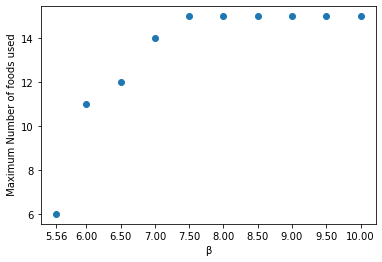

In [109]:
cost=[5.56,6,6.5,7,7.5,8,8.5,9,9.5,10]
num_items=[6, 11,12,14,15,15,15,15,15,15]
plt.plot(cost,num_items,'o')
plt.xticks(cost)

plt.xlabel('β')
plt.ylabel(' Maximum Number of foods used')

In [ ]:
num_items=[6, 11,12,14,15,15,15,15,15,15]
t_cost=[5.56,6,6.5,7,7.5,8,8.5,9,9.5,10]
plt.plot(cost,num_items,'o')
plt.xticks(cost)

plt.xlabel('β')
plt.ylabel(' Maximum Number of foods used')

# Whole week program

In [236]:
prob = LpProblem("DietPlanTime", LpMinimize)
COLS = range(len(Amin[0]))

# decision variables are created
x = LpVariable.dicts('x', COLS, lowBound=0, cat='Continuous')
x_chosen = LpVariable.dicts("Chosen",COLS,0,1,cat='Integer')
# objective function
prob += lpSum(c1[j] * x[j] for j in COLS), "obj"

# Constraints
for i in range(len(Amin)):
    prob += lpSum(Amin[i][j] * x[j] for j in COLS) >= bmin[i], keysmin[i]+'min'
    
for i in range(len(Amax)):
    prob += lpSum(Amax[i][j] * x[j] for j in COLS) <= bmax[i],  keysmax[i]+'max'

for i in COLS:
    prob += x[i]>= x_chosen[i]*0.50, 'chooseconstraintg'+str(i)
    prob += x[i]<= x_chosen[i]*1e5, 'chooseconstraintl'+str(i)
    
prob+=lpSum(  x_chosen[j] for j in COLS)>=6,'Numberofdifferentfoods'
    
x[0].cat = 'Integer'
x[6].cat = 'Integer'
x[7].cat = 'Integer'
x[15].cat = 'Integer'
x[16].cat = 'Integer'
x[17].cat = 'Integer'
x[19].cat = 'Integer'


BestSolutions=[]
for i in range(7):
    prob.solve()
    Solution=[]
    print("Status:", LpStatus[prob.status])
#print(f'objective :{value(prob.objective):5.2f}')
#Optimal variables values
    for v in prob.variables():
        if v.name[0]!='C':
            if v.varValue>0:
                print(f'{VarToFood[v.name]} = {v.varValue:5.2f} portions')
                Solution.append({VarToFood[v.name]:v.varValue})
    BestSolutions.append(Solution)
    
    for v in prob.variables():
        if v.name[0]!='C':
            if v.varValue>0:
                
                v.upBound=v.varValue-0.000003*v.varValue
                #print(v.varValue)
    print('\n')


Status: Optimal
Milk1.7% =  2.31 portions
Pork =  1.34 portions
Spaghetti =  1.35 portions
Bread =  1.00 portions
Beans =  3.00 portions
Chicken =  3.09 portions


Status: Optimal
Milk1.7% =  2.17 portions
Pork =  1.13 portions
Spaghetti =  1.31 portions
Beans =  3.00 portions
Potatoes =  0.50 portions
Yoghurt5% =  0.50 portions
Chicken =  3.07 portions


Status: Optimal
Milk1.7% =  2.17 portions
Pork =  0.95 portions
Fish =  0.50 portions
Spaghetti =  1.31 portions
Bread =  1.00 portions
Beans =  3.00 portions
Brocoli =  0.61 portions
Chicken =  3.04 portions


Status: Optimal
Milk1.7% =  2.17 portions
Pork =  0.95 portions
Spaghetti =  0.88 portions
Bread =  1.00 portions
Beans =  3.00 portions
Brocoli =  0.58 portions
Orange =  2.00 portions
Chicken =  3.04 portions
Beef =  0.55 portions


Status: Optimal
Eggs =  4.00 portions
Milk1.7% =  2.17 portions
Pork =  0.95 portions
Spaghetti =  0.88 portions
Rice =  1.24 portions
Bread =  1.00 portions
Beans =  2.00 portions
Cereal =  0.95 